# Project - Data cleaning & wrangling

# Hipotesis
1.En los casos registrados el numero de victimas ya sean mortales o no es 80% mas hombres que mujeres

2.Las victimas mortales son mas hombres que mujeres comparando porcentualmente los accidentes en cada genero



# Desarrollo

Empece importando las librerias necesarias para explorar, analizar y graficar el dataframe, (PANDAS, NUMPY, SEABORN, MATPLOT)

Luego importe el archivo con un extra llamada encoding='latin1' el cual encontre en internet, ya que sin el no me permitita importar el archivo a jupiter-notebook

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tiburones=pd.read_csv("C:/Users/dfnev/OneDrive/Desktop/data-cleaning-pandas/attacks.csv", encoding='latin1')
tiburones


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explorar dataset

Empeze mirando rapidamente las columnas en las que me centraria segun mis hipotesis (SEX y FATAL Y/N)

A primera vista vi muchas filas con valores nulos en todas sus columnas y tambien un par de columnas exactamente iguales, tambien pude ver una columna practicamente con indice ya hecho (original order)

Conte los valores que habian en las 2 columnas a analizar y asi vizualizar que tenia que limpiar 

In [65]:
tiburones['Fatal (Y/N)'].value_counts()


N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [66]:
tiburones['Sex '].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex , dtype: int64

# Organizar el dataset

Lo primero que hice para organizar fue coger la columna (original order) que practicmente era un indice, la envie al comienzo del dataframe para vizalizarlo mejor para luego ordernarlo en orden creciente y asignarlo como indice

Imprimi para comprobar los cambios

In [67]:
tiburones.insert(0,'original order', tiburones.pop('original order'))
tiburonesordenado= tiburones.sort_values('original order', ascending=True)
tiburones1=tiburonesordenado.set_index('original order')
tiburones2=tiburones1.reset_index(drop=True)
tiburones2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,Unnamed: 22,Unnamed: 23
0,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,NaN,NaN
1,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,NaN,NaN
2,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,NaN,NaN
3,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,NaN,NaN
4,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Limpiar el dataset

Una vez ordenado procedi a eliminar los espacios ya fuesen antes o al final de las palabras en los nombres de las columnas, para luego proceder a eliminar todas las columnas que no me me fuesen referentes para analizar mis hipotesis, quedandome unicamente con un data frame con las columnas (SEX y FATAL Y/N).

Dentro de este dataset reducido eliminie todas aquellas filas que tenian todos sus datos nulos en ambas columnas, para mas facilidad al ir escribiendo el codigo puse en mayusculas el nombre de la columna FATAL Y/N y luego elimine los espacios en blanco antes y al final de todos los datos en ambas columnas.

Imprimi tanto el data frame como los valores unicos de las columnar para revisar

In [68]:
tiburones2.columns = tiburones2.columns.str.replace(' ', '')
tiburones2.columns

Index(['CaseNumber', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal(Y/N)', 'Time',
       'Species', 'InvestigatororSource', 'pdf', 'hrefformula', 'href',
       'CaseNumber.1', 'CaseNumber.2', 'Unnamed:22', 'Unnamed:23'],
      dtype='object')

In [69]:
tiburones3=tiburones2.drop(['Activity', 'Species', 'Injury','Type','Date','Time','Age','Name','Location','Area','Country','Year','pdf', 'InvestigatororSource', 'hrefformula', 'href', 'CaseNumber','CaseNumber.1','CaseNumber.2','Unnamed:22', 'Unnamed:23'], axis=1)
tiburones4=tiburones3.dropna(thresh=1)
tiburones5= tiburones4.dropna(subset=['Fatal(Y/N)','Sex'])
tiburones5['Fatal(Y/N)'] = tiburones5['Fatal(Y/N)'].str.upper()
tiburones5['Fatal(Y/N)']=tiburones5['Fatal(Y/N)'].str.strip()
tiburones5['Sex']=tiburones5['Sex'].str.strip()
tiburones5

C:\Users\dfnev\AppData\Local\Temp\ipykernel_4180\701596155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiburones5['Fatal(Y/N)'] = tiburones5['Fatal(Y/N)'].str.upper()
C:\Users\dfnev\AppData\Local\Temp\ipykernel_4180\701596155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiburones5['Fatal(Y/N)']=tiburones5['Fatal(Y/N)'].str.strip()
C:\Users\dfnev\AppData\Local\Temp\ipykernel_4180\701596155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Sex,Fatal(Y/N)
0,M,Y
1,M,Y
2,M,Y
3,M,Y
4,M,Y
...,...,...
6297,M,N
6298,M,N
6299,M,N
6300,F,N


In [70]:
tiburones5['Sex'].unique()

array(['M', 'F', 'N', '.', 'lli'], dtype=object)

In [71]:
tiburones5['Fatal(Y/N)'].unique()

array(['Y', 'N', 'UNKNOWN', '2017', 'M'], dtype=object)

Buscaba tener solo dos variables en las columnas asi que elimine las filas que tuvieran variables que no estuvieran claras

Volvi a contar los valores unicos de cada columna para confirmar el procedimiento anterior

In [72]:
tiburones5=tiburones5[tiburones5["Fatal(Y/N)"].str.contains("2017") == False]
tiburones5=tiburones5[tiburones5["Fatal(Y/N)"].str.contains("M") == False]
tiburones5=tiburones5[tiburones5["Fatal(Y/N)"].str.contains("UNKNOWN") == False]
tiburones5=tiburones5[tiburones5["Sex"].str.contains("N") == False]
tiburones5=tiburones5[tiburones5["Sex"].str.contains("lli") == False]
tiburones5=tiburones5[tiburones5["Sex"].str.contains("\.") == False]
tiburones5

,Sex,Fatal(Y/N)
0,M,Y
1,M,Y
2,M,Y
3,M,Y
4,M,Y
...,...,...
6297,M,N
6298,M,N
6299,M,N
6300,F,N


In [73]:
tiburones5['Fatal(Y/N)'].unique()

array(['Y', 'N'], dtype=object)

In [74]:
tiburones5['Sex'].unique()

array(['M', 'F'], dtype=object)

Resetee el indice para que me mostrara los valores reales y totales de las filas existentes

In [75]:
tiburones5=tiburones5.reset_index(drop=True)
tiburones5

,Sex,Fatal(Y/N)
0,M,Y
1,M,Y
2,M,Y
3,M,Y
4,M,Y
...,...,...
5225,M,N
5226,M,N
5227,M,N
5228,F,N


# Analisis el dataset

Una vez mi data frame reducido procedi a analizar los datos, para una mejor vizualiacion conte el total de muertes fatales o no por genero

In [76]:
tiburones5.groupby("Sex").agg("count")

,Fatal(Y/N)
Sex,
F,575
M,4655


In [77]:
tiburones5.groupby("Fatal(Y/N)").agg("count")

,Sex
Fatal(Y/N),
N,3950
Y,1280


In [78]:
pd.DataFrame(tiburones5.groupby(["Sex", "Fatal(Y/N)"])["Fatal(Y/N)"].count())

Fatal(Y/N)
Sex Fatal(Y/N)            
F   N                  468
    Y                  107
M   N                 3482
    Y                 1173

Con el dataset anterior pude relizar facilmente mis calculos porcentuales donde pude ver que:

Ambas de mis hipoteis son correctas

Hubo mas del 80% de accidentes en hombres 

Dentro de los accidente en mujeres solo el 22% termino en muerte y en cuanto a los hombres un 66% termino en muerte 

# GRAFICOS

Para el grafico a continuacion use la libreria Matplotlib para vizualizar el total de ataques dividido por genero

En este grafico se puede ver que dentro de los ataque registrados y con informacion clara, el 87% de los casos ha occurido en hombres, comprobando asi mi hipotesis numero 1 

<AxesSubplot:title={'center':'Numero de ataques'}>

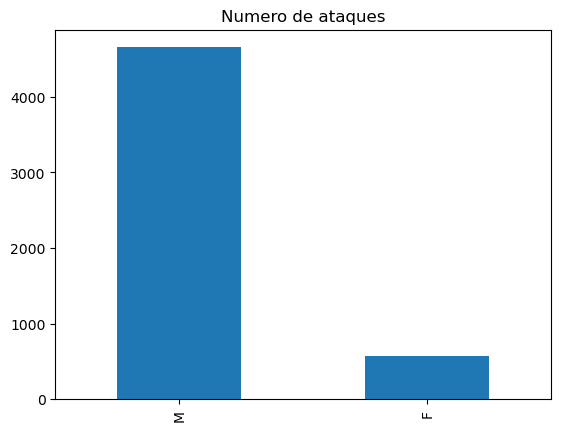

In [79]:
tiburones5["Sex"].value_counts().plot(kind="bar", title="Numero de ataques")


En el siguiente grafico use la libreria SEABORN para vizualizar el total de accidente ocurridos en ambos generos, pero esta vez dividiendo las barras del grafico en FATAL o NO FATAL 

En este grafico implante un titulo para el grafico con un respectivo tamaño y etiquetas en ambos ejes


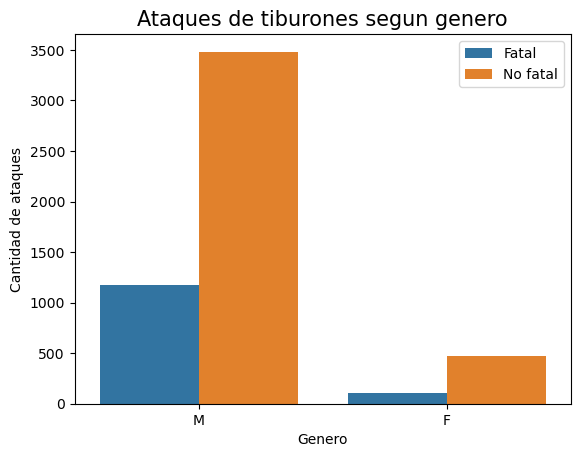

In [80]:
sns.countplot(x=tiburones5["Sex"], hue=tiburones5["Fatal(Y/N)"])
plt.ylabel("Cantidad de ataques")
plt.xlabel("Genero")
plt.legend(labels = ['Fatal', 'No fatal'])
plt.title("Ataques de tiburones segun genero", size=15);

En el sigueinte grafico use nuevamente la libreria SEABORN para esta vez agrupar ambos datos de los genero en solo 2 columnas y asi vizualizar mejor el porcentaje de fatalidaes superior en hombres

Comprobando asi que mi segunda hipotesis tambien es correcta

<AxesSubplot:xlabel='Sex', ylabel='Count'>

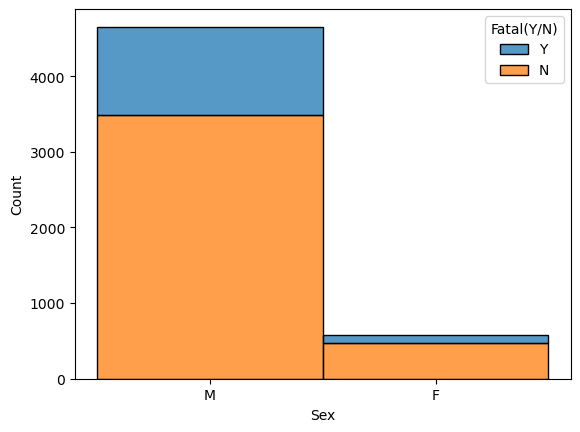

In [54]:
sns.histplot(data=tiburones5, x="Sex", hue="Fatal(Y/N)", multiple="stack")